In [1]:
#!pip install nba_api
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
#Call the data from the player data .csv and truncate to only include 1989-90 seasons onward
closed_file = 'NBA PROJECTS.csv'
players = pd.read_csv(closed_file)
players = players.loc[(players['Tm'] != 'TOT')& (players['Year'] >= 1990)]

In [2]:
record_file = 'NBA Season Records.csv'
name_file = 'NBA Abbreviations.csv'
records = pd.read_csv(record_file)
names = pd.read_csv(name_file)
#Clean the data in the season column to go from str(2016-17) format to float(2017) format
ssns = []
for year in records['Season']:
    yr = int(year.split('-')[1])
    if ((10 <= yr) & (yr < 20)):
        ssns.append(float('20' + str(yr)))
    elif((0 <= yr) & (yr < 10)):
        ssns.append(float('200' + str(yr)))
    else:
        ssns.append(float('19' + str(yr)))
seasons = pd.Series(ssns)
records['Season'] = seasons
#Truncate the data to only represent seasons from 1989-90 onward (removing 2017-18 as it was not in the other dataframe)
records = records.loc[(records['Season'] >= 1990) & (records['Season'] <= 2017)]
#Remove the * after the team name denoting a playoff presence
records['Team'] = records['Team'].str.replace('*', '')
#Change the names of the teams on the record dataset to the abbreviations on the abbreviation dataset
records['Team'] = records['Team'].map(names.set_index('Team')['Abbreviation'])
#Special condition for "Charlotte Hornets." The name was not used contiguously, so additional conditions were needed
records.loc[(records['Team'].isnull() == True) & 
            (records['Season'] >= 2015), 'Team'] = records.loc[(records['Team'].isnull() == True) & 
                                                               (records['Season'] >= 2015), 'Team'].replace({np.nan:'CHA'})
records.loc[(records['Team'].isnull() == True) & 
            (records['Season'] < 2015), 'Team'] = records.loc[(records['Team'].isnull() == True) & 
                                                               (records['Season'] < 2015), 'Team'].replace({np.nan:'NOP'})
records = records.rename(columns = {'Team':'Tm', 'Season':'Year'})
#Denote whether the team made the playoffs that season
records['Made Playoffs'] = records['Playoffs'].notna()

In [3]:
#Rename some of the team abbreviations to capture recent franchise movement/rename.
players = players.replace({'Tm':{'WSB':'WAS', 'VAN': 'MEM', 'NJN': 'BRK', 'SEA': 'OKC', 
                         'CHH':'NOP', 'NOH': 'NOP', 'NOK': 'NOP', 'CHO':'CHA' }})

In [4]:
#Merge the season results data with the player data. Season data is duplicated for each player
nba = pd.merge(players, records, on = ['Year', 'Tm'], how = 'left')
#Write to csv for easier visualization
nba.to_csv("test_output/merge_results.csv", index=False, header=True)

In [5]:
nba

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS,Made Playoffs
0,9547,1990.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,...,104.1,5.8,105.8,-2.3,114.3,6.2,NaN,M. Guokas (18-64),O. Smith (3.3),False
1,9548,1990.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,...,105.4,7.1,108.0,-0.1,106.7,-1.4,Lost W. Conf. 1st Rnd.,D. Moe (43-39),F. Lever (8.8),True
2,9549,1990.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,...,94.4,-3.9,109.9,1.8,103.5,-4.6,Won Finals,C. Daly (59-23),B. Laimbeer (10.1),True
3,9550,1990.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,...,96.7,-1.6,104.8,-3.3,110.0,1.9,NaN,J. Reynolds (7-21) D. Motta (16-38),R. McCray (7.9),False
4,9551,1990.0,Mark Alarie,PF,26.0,WAS,82.0,10.0,1893.0,14.1,...,99.4,1.1,107.5,-0.6,109.7,1.6,NaN,W. Unseld (31-51),D. Walker (6.3),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13772,24686,2017.0,Cody Zeller,PF,24.0,CHA,62.0,58.0,1725.0,16.7,...,95.7,-0.7,108.8,0.0,108.6,-0.2,NaN,S. Clifford (36-46),K. Walker (8.1),False
13773,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5),True
13774,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,96.8,0.4,103.7,-5.1,110.5,1.7,NaN,F. Vogel (29-53),E. Payton (4.4),False
13775,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,95.3,-1.1,107.4,-1.4,107.0,-1.8,Lost E. Conf. 1st Rnd.,F. Hoiberg (41-41),J. Butler (13.8),True


,3P% Yr Avg
Year,
1990.0,0.217191
1991.0,0.211539
1992.0,0.215209
1993.0,0.220591
1994.0,0.235655


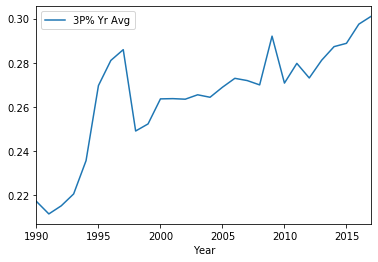

In [76]:
years = nba.groupby(['Year']).mean()
shooting = years[['3P%']].rename(columns = {'3P%': '3P% Yr Avg'})
shooting.plot(kind = 'line')
shooting.head()

In [165]:
nba_teams = nba.groupby(['Year','Tm']).mean()
teams_positions = nba.groupby(['Year','Tm', 'Pos']).mean()
teamshooting = nba_teams[['3P', '3PA', '3P%', 'Made Playoffs']]
teamshooting_positions = teams_positions[['3P', '3PA', '3P%']]
teamshooting_positions['Pos Counts'] = nba.groupby(['Year','Tm', 'Pos']).count()['Player']
teamshooting_positions['Pos Fraction'] = (teamshooting_positions['Pos Counts'])/(nba.groupby(['Year','Tm']).count()['Player'])
teamshooting_positions['3P% Team Avg'] = teamshooting['3P%']
teamshooting_positions['Weighted Pos 3P%'] = (teamshooting_positions['3P%']*teamshooting_positions['Pos Fraction'])/teamshooting_positions['3P% Team Avg']
teamshooting_positions['3P% Diff'] = teamshooting_positions['Weighted Pos 3P%'] - teamshooting_positions['3P% Team Avg']
teamshooting_positions['Pos Var'] = (teamshooting_positions['3P% Diff'])**2
variance = teamshooting_positions.groupby(level = [0,1]).sum()['Pos Var']
teamshooting['3P% Var'] = variance
print(teamshooting)

                   3P         3PA       3P%  Made Playoffs   3P% Var
Year   Tm                                                           
1990.0 ATL   6.888889   22.833333  0.182625          False  0.056010
       BOS   8.153846   31.076923  0.159917           True  0.059205
       BRK   7.368421   26.631579  0.136133          False  0.086386
       CHI  17.857143   47.785714  0.249556           True  0.148369
       CLE  20.352941   50.058824  0.245154           True  0.587193
...               ...         ...       ...            ...       ...
2017.0 SAC  38.789474  103.210526  0.323158          False  0.119399
       SAS  47.062500  120.437500  0.384385           True  0.182774
       TOR  42.647059  117.411765  0.334313           True  0.092530
       UTA  52.733333  141.866667  0.293000           True  0.105421
       WAS  42.000000  112.777778  0.289867           True  0.061972

[813 rows x 5 columns]


C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

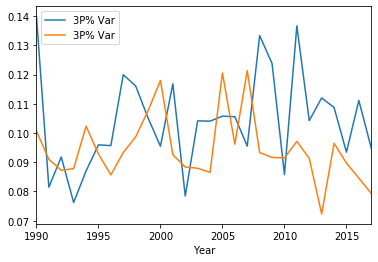

In [166]:
made_playoffs = teamshooting.loc[teamshooting['Made Playoffs'] == True]
winning_var = made_playoffs.groupby(level=0).mean()['3P% Var']
no_playoffs = teamshooting.loc[teamshooting['Made Playoffs'] == False]
losing_var = no_playoffs.groupby(level=0).mean()['3P% Var']
teams = pd.concat([winning_var, losing_var], axis = 1)
teams.plot()

(0.8241914625349471, 2.1747037866385124e-08)


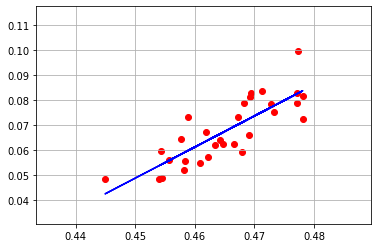

In [8]:
x = teams['eFG%']
y = teams['WS/48']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x, y)
plt.scatter(x,y, facecolors = 'red')
plt.plot(x, line, color = "blue")
plt.grid(b = True)
print(cor)


In [189]:
#create column in nba that adds that years avg shooting value to each row
nba_new = pd.merge(nba, shooting, on = ['Year'], how = 'left')

nba_above_avg = nba_new.loc[nba_new['3P%'] >= nba_new['3P% Yr Avg']]
nba_above_avg_short = nba_above_avg.loc[(nba_above_avg['Year'] == 1990) | (nba_above_avg['Year'] == 1995) | (nba_above_avg['Year'] == 2000) | (nba_above_avg['Year'] == 2005) |
                                  (nba_above_avg['Year'] == 2010) | (nba_above_avg['Year'] == 2015) | (nba_above_avg['Year'] == 2017)]

above_avg = nba_above_avg.groupby(['Year','Pos'])
print(above_avg['3P%'])
above_avg['Pos Ratio'] = (above_avg['3P%']) / (nba_new.groupby(['Year', 'Pos']).count()['Player'])
above_avg['Wgt Pos Ratio'] = (above_avg['Player']) / (nba_above_avg.groupby(['Year']).count()['Player'])
print(above_avg.head())
print(nba_new['Player'].count())
#print(nba_above_avg.groupby(['Year']).count()['Player'])

ValueError: operands could not be broadcast together with shapes (140,2) (140,) 

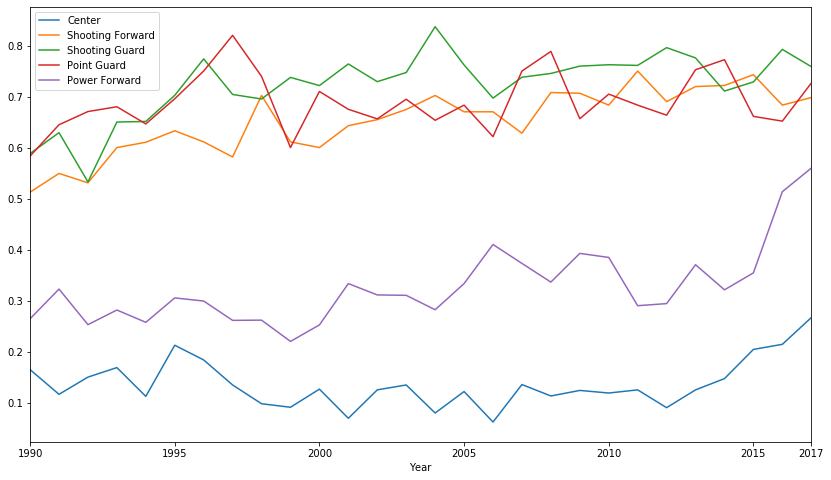

In [10]:
above_avg.xs('C', level = 1)['Pos Ratio'].plot(label = 'Center', figsize = (14, 8), xticks = [1990, 1995, 2000, 2005, 2010, 2015, 2017])
above_avg.xs('SF', level = 1)['Pos Ratio'].plot(label = 'Shooting Forward')
above_avg.xs('SG', level = 1)['Pos Ratio'].plot(label = 'Shooting Guard')
above_avg.xs('PG', level = 1)['Pos Ratio'].plot(label = 'Point Guard')
above_avg.xs('PF', level = 1)['Pos Ratio'].plot(label = 'Power Forward')
plt.legend()

Text(0, 0.5, 'Weighted Three Point Contribution Ratios by Position')

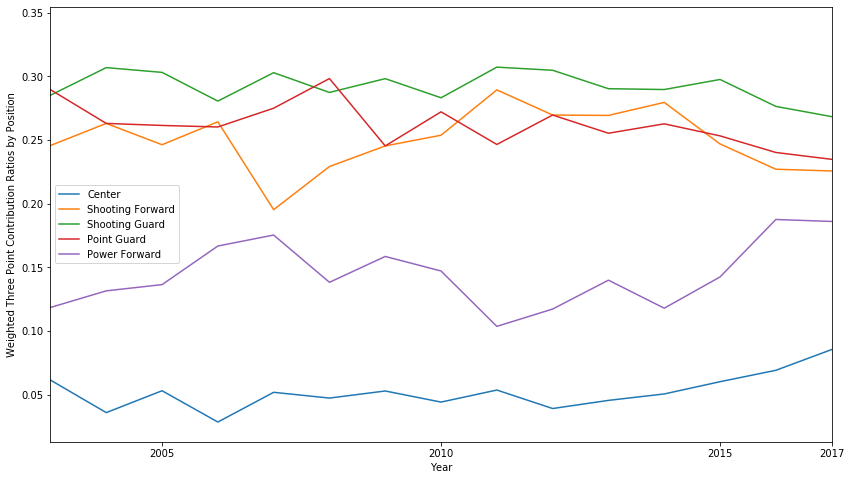

In [102]:
above_avg.xs('C', level = 1)['Wgt Pos Ratio'].plot(label = 'Center', figsize = (14, 8), xticks = [1990, 1995, 2000, 2005, 2010, 2015, 2017])
above_avg.xs('SF', level = 1)['Wgt Pos Ratio'].plot(label = 'Shooting Forward')
above_avg.xs('SG', level = 1)['Wgt Pos Ratio'].plot(label = 'Shooting Guard')
above_avg.xs('PG', level = 1)['Wgt Pos Ratio'].plot(label = 'Point Guard')
above_avg.xs('PF', level = 1)['Wgt Pos Ratio'].plot(label = 'Power Forward')
plt.legend()
plt.xlim(2003)
plt.ylabel('Weighted Three Point Contribution Ratios by Position')

        Unnamed: 0  Player  Age   Tm    G   GS   MP  PER  TS%  3PAr  ...  \
Year                                                                 ...   
1990.0         177     177  177  177  177  177  177  177  177   177  ...   
1991.0         184     184  184  184  184  184  184  184  184   184  ...   
1992.0         183     183  183  183  183  183  183  183  183   183  ...   
1993.0         194     194  194  194  194  194  194  194  194   194  ...   
1994.0         193     193  193  193  193  193  193  193  193   193  ...   
1995.0         219     219  219  219  219  219  219  219  219   219  ...   
1996.0         248     248  248  248  248  248  248  248  248   248  ...   
1997.0         251     251  251  251  251  251  251  251  251   251  ...   
1998.0         247     247  247  247  247  247  247  247  247   247  ...   
1999.0         208     208  208  208  208  208  208  208  208   208  ...   
2000.0         223     223  223  223  223  223  223  223  223   223  ...   
2001.0      

ValueError: x and y must be the same size

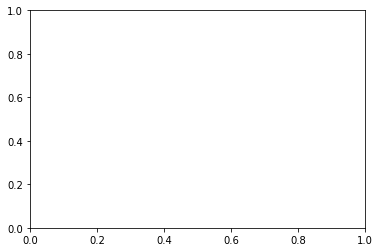

In [173]:
pos_num = 5
ideal_ratio = 1/pos_num
above_avg['Wgt Var'] = ((above_avg['Wgt Pos Ratio']-ideal_ratio)**2)
pos_var = above_avg.groupby(level=0).sum()#['Wgt Var']
print(pos_var)
plt.scatter(pos_var.index, pos_var)
plt.xlabel('Year')
plt.xlim(1990)
plt.ylabel('Variance in Weighted Position Ratios')

In [170]:
made_playoffs = nba_above_avg.loc[nba_above_avg['Made Playoffs'] == True]
print(made_playoffs)
#playoffs = made_playoffs.groupby(['Year', 'Tm', 'Pos']).mean()[['3PA', '3P%']].fillna(0)

#playoffs['Pos Fraction'] = (made_playoffs.groupby(['Year', 'Tm', 'Pos']).count()['3P%']) / (made_playoffs.groupby(['Year', 'Tm']).count()['3P%'])
#playoffs['Pos Ratio'] = (playoffs['3P%']) / playoffs['Pos Fraction']
#playoffs['Pos Ratio'] = playoffs['Pos Ratio']/pos_num
#playoffs['Wgt Pos Ratio'] = (playoffs['Pos Ratio']) / (made_playoffs.groupby(['Year', 'Tm']).count()['3P%'])
#print(playoffs.head(20))
#print(made_playoffs.groupby(['Year', 'Tm', 'Pos']).count()['3P%'])
#playoffs = nba

       Unnamed: 0    Year           Player Pos   Age   Tm     G    GS      MP  \
1            9548  1990.0    Michael Adams  PG  27.0  DEN  79.0  74.0  2690.0   
2            9549  1990.0     Mark Aguirre  SF  30.0  DET  78.0  40.0  2005.0   
5            9552  1990.0     Steve Alford  PG  25.0  DAL  41.0   0.0   302.0   
11           9558  1990.0  Willie Anderson  SG  23.0  SAS  82.0  81.0  2788.0   
13           9560  1990.0   B.J. Armstrong  PG  22.0  CHI  81.0   0.0  1291.0   
...           ...     ...              ...  ..   ...  ...   ...   ...     ...   
13761       24675  2017.0     Kyle Wiltjer  PF  24.0  HOU  14.0   0.0    44.0   
13767       24681  2017.0     Delon Wright  PG  24.0  TOR  27.0   0.0   446.0   
13768       24682  2017.0      James Young  SG  21.0  BOS  29.0   0.0   220.0   
13771       24685  2017.0   Thaddeus Young  PF  28.0  IND  74.0  74.0  2237.0   
13775       24689  2017.0      Paul Zipser  SF  22.0  CHI  44.0  18.0   843.0   

        PER  ...  Rel_Pace 

In [187]:
nba_new = pd.merge(nba, shooting, on = ['Year'], how = 'left')

whole_league = nba_new.groupby(['Year','Tm','Pos']).count()
whole_league['Pos Ratio'] = (whole_league['Player']) / (nba_new.groupby(['Year', 'Tm']).count()['Player'])
whole_league['Wgt Pos Ratio'] = (whole_league['Player']) / (nba_new.groupby(['Year']).count()['Player'])
whole_league.head(20)
#above_avg['Wgt Pos Ratio'] = (above_avg['Player']) / (nba_above_avg.groupby(['Year']).count()['Player'])
#print(above_avg.head())
#print(nba_new['Player'].count())

Unnamed: 0  Player  Age  G  GS  MP  PER  TS%  3PAr  FTr  ...  \
Year   Tm  Pos                                                           ...   
1990.0 ATL C             3       3    3  3   3   3    3    3     3    3  ...   
           PF            3       3    3  3   3   3    3    3     3    3  ...   
           PG            6       6    6  6   6   6    6    6     6    6  ...   
           SF            3       3    3  3   3   3    3    3     3    3  ...   
           SG            3       3    3  3   3   3    3    3     3    3  ...   
       BOS C             2       2    2  2   2   2    2    2     2    2  ...   
           PF            3       3    3  3   3   3    3    3     3    3  ...   
           PG            4       4    4  4   4   4    4    4     4    4  ...   
           SF            2       2    2  2   2   2    2    2     2    2  ...   
           SG            2       2    2  2   2   2    2    2     2    2  ...   
       BRK C             3       3    3  3   3   3    3    3     3    3  ...   
           PF            5       5    5  5   5   5    5    5     5    5  ...   
           PG            2       2    2  2   2   2    2    2     2    2  ...   
           SF            3       3    3  3   3   3    3    3     3    3  ...   
           SG            6       6    6  6   6   6    6    6     6    6  ...   
       CHI C             2       2    2  2   2   2    2    2     2    2  ...   
           PF            5       5    5  5   5   5    5    5     5    5  ...   
           PG            3       3    3  3   3   3    3    3     3    3  ...   
           SF            2       2    2  2   2   2    2    2     2    2  ...   
           SG            2       2    2  2   2   2    2    2     2    2  ...   

                Rel_ORtg  DRtg  Rel_DRtg  Playoffs  Coaches  Top WS  \
Year   Tm  Pos                                                        
1990.0 ATL C           3     3         3         0        3       3   
           PF          3     3         3         0        3       3   
           PG          6     6         6         0        6       6   
           SF          3     3         3         0        3       3   
           SG          3     3         3         0        3       3   
       BOS C           2     2         2         2        2       2   
           PF          3     3         3         3        3       3   
           PG          4     4         4         4        4       4   
           SF          2     2         2         2        2       2   
           SG          2     2         2         2        2       2   
       BRK C           3     3         3         0        3       3   
           PF          5     5         5         0        5       5   
           PG          2     2         2         0        2       2   
           SF          3     3         3         0        3       3   
           SG          6     6         6         0        6       6   
       CHI C           2     2         2         2        2       2   
           PF          5     5         5         5        5       5   
           PG          3     3         3         3        3       3   
           SF          2     2         2         2        2       2   
           SG          2     2         2         2        2       2   

                Made Playoffs  3P% Yr Avg  Pos Ratio  Wgt Pos Ratio  
Year   Tm  Pos                                                       
1990.0 ATL C                3           3   0.166667       0.007126  
           PF               3           3   0.166667       0.007126  
           PG               6           6   0.333333       0.014252  
           SF               3           3   0.166667       0.007126  
           SG               3           3   0.166667       0.007126  
       BOS C                2           2   0.153846       0.004751  
           PF               3           3   0.230769       0.007126  
           PG               4           4   0.307692       0.0